In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim


In [15]:
batch_size = 10
epochs = 2
lr = 0.001
num_classes = 10
input_size = 784
hidden1=100

In [3]:
train = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download= True)
test = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

In [4]:
trainset = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle = True)
testset = torch.utils.data.DataLoader(dataset = test, batch_size= batch_size, shuffle=True)



### Neural Network Class 

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden1, num_classes):
        super().__init__()

        # defining the layers

        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, num_classes)

    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)

        return F.log_softmax(output, dim=1)



net = NeuralNet(input_size, hidden1, num_classes)
print(net)
        

NeuralNet(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [10]:
X = torch.rand(28, 28)
X = X.view(1, 28*28)

P assing the randomized tensors through the model in a dimension which is desired. Hence we reshape the whole X tensor

In [11]:
net(X) #

tensor([[-2.4919, -2.3944, -2.6334, -2.2578, -2.3612, -2.2274, -2.3045, -2.2540,
         -2.3360, -1.9243]], grad_fn=<LogSoftmaxBackward0>)

In [14]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)>

In [17]:
optimizer = optim.Adam(net.parameters(), lr = lr)

for epoch in range(epochs):
    for data in trainset:
        # data is a batch of features and labels

        x, y = data

        net.zero_grad()

        output = net(x.view(-1, 28*28))

        # now calc how wrong were we

        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    



tensor(0.1179, grad_fn=<NllLossBackward0>)
tensor(0.0573, grad_fn=<NllLossBackward0>)


In [22]:

for idx, i in enumerate(output):
    print(idx)
    print(i)
    print(torch.argmax(i))

0
tensor([ -4.0390, -12.4763,  -7.1594,  -1.9790,  -7.6070,  -8.0271,  -8.5430,
         -8.4840,  -0.2721,  -2.5210], grad_fn=<UnbindBackward0>)
tensor(8)
1
tensor([-1.4156e+01, -1.2875e+01, -1.1540e+01, -1.2969e+01, -1.2296e+01,
        -9.1108e+00, -2.8106e-04, -2.5166e+01, -8.8003e+00, -2.1477e+01],
       grad_fn=<UnbindBackward0>)
tensor(6)
2
tensor([-1.5932e+01, -2.5947e+01, -1.9393e+01, -1.6551e+01, -1.6982e+01,
        -1.4941e+01, -5.9605e-07, -2.2031e+01, -1.7209e+01, -1.8755e+01],
       grad_fn=<UnbindBackward0>)
tensor(6)
3
tensor([-2.3781e+01, -2.8083e+01, -1.4980e+01, -1.5115e+01, -3.0509e+01,
        -2.1333e+01, -4.2369e+01, -1.0729e-06, -2.5256e+01, -1.4469e+01],
       grad_fn=<UnbindBackward0>)
tensor(7)
4
tensor([-2.3949e+01, -1.0174e+01, -2.9674e-03, -8.5721e+00, -2.8911e+01,
        -1.4659e+01, -2.4664e+01, -1.2504e+01, -5.9030e+00, -2.0251e+01],
       grad_fn=<UnbindBackward0>)
tensor(2)
5
tensor([-1.9602e+01, -1.9932e+01, -1.2881e+01, -1.2242e+01, -2.7086e+0

In [23]:
correct =0 
total = 0

with torch.no_grad():
    for data in trainset:
        x, y = data

        output = net(x.view(-1, 28*28))

        for idx, out in enumerate(output):
            if torch.argmax(out) == y[idx]:
                correct += 1
            
            total += 1

print("Accuracy: ", round(correct/total, 3))
                

Accuracy:  0.978


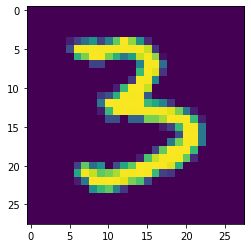

In [37]:
plt.imshow(x[9].view(28,28))

plt.show()

In [38]:
torch.argmax(net(x[9].view(-1, 784))[0])

tensor(3)